In [40]:
%pylab inline
#Import code from previous videos:
from part5 import *

Populating the interactive namespace from numpy and matplotlib


In [41]:
from scipy import optimize

In [42]:
class Trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, \
                                 jac=True, method='BFGS', \
                                 args=(X, y), options=options, \
                                 callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [43]:
NN = NeuralNetwork()

In [44]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [45]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [46]:
T = Trainer(NN)

In [47]:
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 92
         Function evaluations: 100
         Gradient evaluations: 100


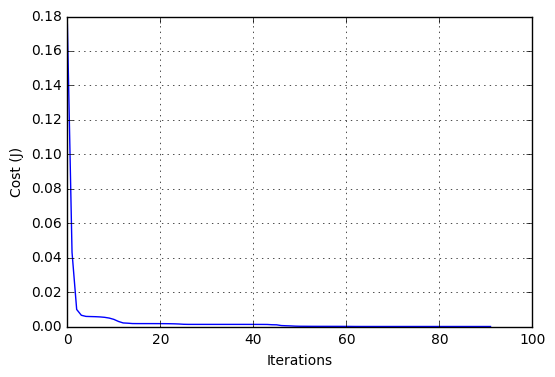

In [48]:
plot(T.J)
grid(1)
xlabel('Iterations')
ylabel('Cost (J)')

In [49]:
NN.costFunctionPrime(X,y)

(array([[ -1.09458261e-07,  -3.64523267e-08,  -2.44266607e-11],
        [  1.02866207e-06,  -1.96105652e-06,   6.03525930e-11]]),
 array([[  2.46180246e-07],
        [  2.70939823e-07],
        [  3.98286344e-07]]))

In [50]:
NN.forwardPropagation(X)

array([[ 0.7500127 ],
       [ 0.81998856],
       [ 0.92999545]])

In [51]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [52]:
#Test network for various combinations of sleep/study:
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [53]:
allOutputs = NN.forwardPropagation(allInputs)

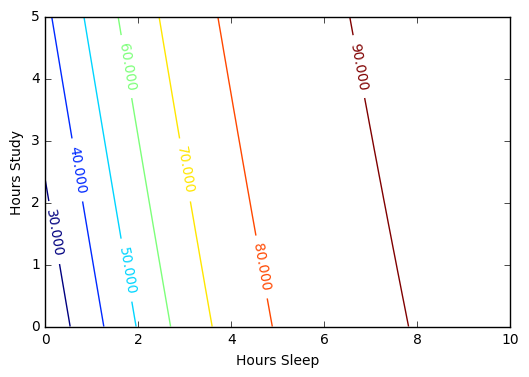

In [54]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

In [55]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

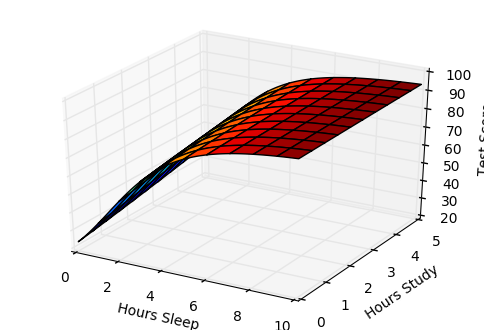

In [56]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')